# Projeto Boston Housing



# Configuração inicial

Vamos começar importando algumas bibliotecas básicas:

*Numpy* - Pacote para computação científica em Python. [Saiba mais.](https://numpy.org/)

*os* - Diversas interfaces para sistema operacional. [Saiba mais.](https://docs.python.org/3/library/os.html)

O NumPy é extramente útil, fornecendo das mais básicas às mais avançadas técnicas de computação científica.



In [1]:
# Importações comuns
import numpy as np
import os

Vamos agora fixar o sorteio aleatório de números no nosso projeto. Observa que isso é importante para que possamos reproduzir o modelo.

In [2]:
#Para garantir estabilidade e ser mais fácil reproduzir experimento
seed = 42
np.random.seed(seed)

Vamos agora importar módulo básicos do [matplotlib](https://matplotlib.org/) para plotar figuras. [Confira aqui](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.rc.html) a documentação do matplotlib.rc

In [3]:
# Para plotar figuras
%matplotlib inline #Gráficos matplotlib incluídos no notebook, ao lado do código
import matplotlib as mpl 
import matplotlib.pyplot as plt 

mpl.rc('axes', labelsize=14) 
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

UsageError: unrecognized arguments: #Gráficos matplotlib incluídos no notebook, ao lado do código


É comum que alarmes sejam disparados quando há algum erro interno ao rodar os códigos. Em geral é importante manter eles ligados pois podem nos ajudar a identificar possíveis erros no código. 

Por hora vamos desligar alguns warnings desnecessários relacionados ao 'internal gelsd'. Você pode conferir essa issue [aqui no GitHub](https://github.com/scipy/scipy/issues/5998). 

In [4]:
# Ignorar warnings desnecessários (ver SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Obtendo os dados

Nesta etapa você deverá obter os dados necessários ao problema. A função definida à serguir faz um htpp request no link, faz download do arquivo zip e após isso extrai os dados, salvando no diretório "datasets/housing".

In [5]:
import os
import tarfile

Vamos importar a biblioteca do pandas que é extremamente útil para lidar dataframs (tabela de dados). Vamos carregar os dados no diretório criado, criando um ***pandas frame*** que conterá as informações do arquivo housing.csv

In [6]:
import pandas as pd

url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'

pf = pd.read_csv(url, error_bad_lines=False)
housing = pf

# Conheçendo os dados

Vamos começar visualizando as 5 primeiras linhas do dataframe

In [7]:
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Observa que todas as 5 primeiras amostras estão de certa forma ordenados.  

Vamos fazer então o seguinte: vamos coletar uma amostra contendo 10 instâncias para visualizar os nossos dados. Observa que esse processo envolve uma aleatoriedade, daí a importância de fixar random_state em um certo valor caso você tenha interesse em reproduzir o experimento.

In [9]:
housing.sample(n = 10, random_state = seed)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52,22.8
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27,16.1
76,0.10153,0.0,12.83,0,0.437,6.279,74.5,4.0522,5,398,18.7,373.66,11.97,20.0
316,0.31827,0.0,9.90,0,0.544,5.914,83.2,3.9986,4,304,18.4,390.70,18.33,17.8
140,0.29090,0.0,21.89,0,0.624,6.174,93.6,1.6119,4,437,21.2,388.08,24.16,14.0
471,4.03841,0.0,18.10,0,0.532,6.229,90.7,3.0993,24,666,20.2,395.33,12.87,19.6
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8


Vamos agora nos informar a respeito das variáveis do problemas

In [10]:
housing.info() #Rápida descrição dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


As características (**features**) são as seguintes:


1. crim: Taxa de crime per capita por cidade;

2. zn: Proporção de terreno residencial zoneado para lotes com mais de 25.000 pés quadrados;

3. indus: Proporção de acres de negócios não rentáveis por cidade; 

4. chas: Variável de Charles River (1 se a área limita o rio; 0 caso contrário);

5. nox: Concentração de óxidos nítricos (parte por 10 milhões);

6. rm: Número médio de quartos por habitação;

7. age: Proporção de casas construídas antes de 1940;

8. dis: Distâncias ponderadas para cinco centros de empregos de Boston;

9. rad: Índice de acessibilidade a rodovias;

10. tax: taxa de imposto de propriedade no valor total de $ \$ 10.000 $;

11. ptratio: Proporção aluno-professor por cidade;

12. b: $1000(B_k - 0.63)^2$ onde $B_k$ é a proporção de negros por cidade;

13. lstat:  percentual da população de classe baixa;

14. medv: Valor médio das casas $\times$ $\$ 1.000$;

Todos as características são numéricas.

Vamos agora extrair algumas medidas resumo do nosso conjunto de dados.

In [11]:
housing.describe() #Medidas resumo

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Alguns histogramas também são úteis para compreender o problema

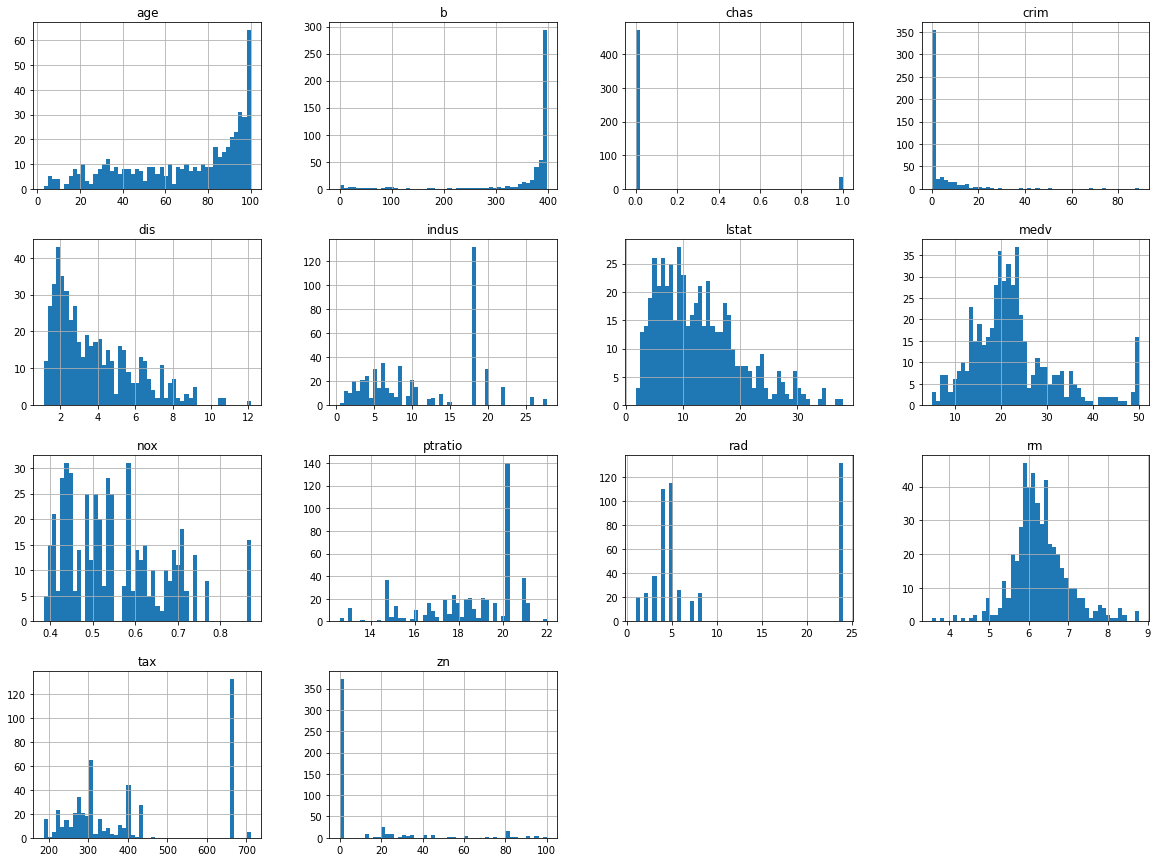

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

#Separando o conjunto de dados

Se quisermos utilizar um conjunto de teste para realizar uma estimativa "não enviesada" do modelo final é importante já separarmos o conjunto de treino e teste desde já.

Observa que a função train_test_split implentada no scikit-learn tem como padrão shuffle = True. Isto quer dizer que ele irá embaralhar os dados e então fara a divisão do conjunto de dados em treino e teste. 

É importante que os dados sejam embaralhados pois é comum que exista algum tipo de ordenação nos dados, de forma que se você não embaralhar os dados estará introduzindo tendencias ou vieses que não existem nos dados reais. </font>


In [13]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, 
                                       test_size=0.2, #20% para teste
                                       random_state=seed)

Essa divisão no conjunto de dados é até então puramente aleatória. Será que esse tipo de divisão é a mais indicada?

Vejamos novamente as medidas resumo da porcentagem da população de baixa renda:

In [25]:
housing["tax"].describe()

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: tax, dtype: float64

In [24]:
mean = np.mean(housing["tax"])
std = np.std(housing["tax"])

Lembrando que "tax" é o imposto sobre a propriedade em determinado bairro a cada 10000 dólares.


Vamos dividir este impostoa em 5 estratos, de 225 em 225 doláres a cada 10000 dólares. Não há nenhuma mágica nessa escolha, senão a questão da facilidade. O correto seria, mais uma vez, usar informações sociais discutidas com o estatístico

Faremos isso criando uma nova feature no nosso dataset. Esse processo de criar novas categorias a partir do conhecimento do problema é chamado de **feature engineering** e abordaremos melhor mais à frente no nosso projeto.

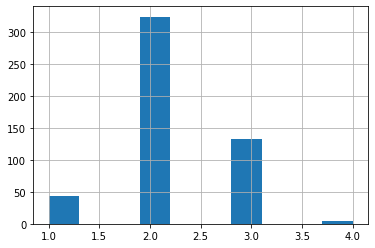

In [27]:
housing["tax_cat"] = pd.cut(housing["tax"],
                               bins=[0., 225.0, 450.0, 675.0, 900.0, np.inf],
                               labels=[1, 2, 3, 4, 5])

housing["tax_cat"].hist()

In [28]:
housing["tax_cat"].value_counts()

2    324
3    133
1     44
4      5
5      0
Name: tax_cat, dtype: int64

Pronto! Agora vamos fazer uma <font color='red'>amostragem estratificada</font> com base nas categorias da renda.  

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=seed)

for train_index, test_index in split.split(housing, housing["tax_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Acabamos de criar novos conjuntos de treino e de teste, que chamamos de <font color='red'>strat_train_set </font> e <font color='blue'>strat_test_set</font>.

 Estes conjuntos devem respeitar a estratificação que introduzimos baseada em "tax" representado na nova variável categórica "tax_cat".

 Vejamos se funcionou:

In [30]:
strat_test_set["tax_cat"].value_counts() / len(strat_test_set) #Proporção de cada categoria em strat_test_set

2    0.637255
3    0.264706
1    0.088235
4    0.009804
5    0.000000
Name: tax_cat, dtype: float64

In [31]:
housing["tax_cat"].value_counts() / len(housing) #Proporção de cada categoria em housing

2    0.640316
3    0.262846
1    0.086957
4    0.009881
5    0.000000
Name: tax_cat, dtype: float64

Podemos agora comparar com a <font color='blue'> amostragem aleatória </font>:

In [32]:
#Função para calcular as proporções das categorias da característica "income_cat"
def income_cat_proportions(data): 
    return data["tax_cat"].value_counts() / len(data)

Agora vamos gerar novamente conjunto de teste e treino, mas usando amostragem aleatória.

In [33]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=seed)

Vamos criar o nosso novo dataframe e visualizar os resultados:

In [34]:
compare_props = pd.DataFrame({
    "Geral": income_cat_proportions(housing),
    "Estratificado": income_cat_proportions(strat_test_set),
    "Aleatorio": income_cat_proportions(test_set),
}).sort_index()

compare_props["Aleatório %erro"] = 100 * compare_props["Aleatorio"] / compare_props["Geral"] - 100
compare_props["Estratificado %erro"] = 100 * compare_props["Estratificado"] / compare_props["Geral"] - 100

compare_props

,Geral,Estratificado,Aleatorio,Aleatório %erro,Estratificado %erro
1,0.086957,0.088235,0.068627,-21.078431,1.470588
2,0.640316,0.637255,0.607843,-5.071411,-0.478092
3,0.262846,0.264706,0.303922,15.627304,0.707651
4,0.009881,0.009804,0.019608,98.431373,-0.784314
5,0.000000,0.000000,0.000000,NaN,NaN


Contentes com os resultados, não podemos esquecer de <font color='red'>remover</font> o atributo "tax_cat" dos conjuntos strat_train_set e strat_test_set. Na verdade, ele era apenas um intermediário, afinal de contas as informações dessa caracaterísticas já estão presentes em "tax".

In [35]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Visualização da estrutura de dados

Vamos agora visualizar os nossos dados. Precisamos ter certeza que não vamos visualizar dados do conjunto de teste, para evitar enviesamento de conclusões. 

De um ponto de vista mais técnico, devemos evitar o **snooping bias**.

In [36]:
housing = strat_train_set.copy() #Importante criar uma cópia! 

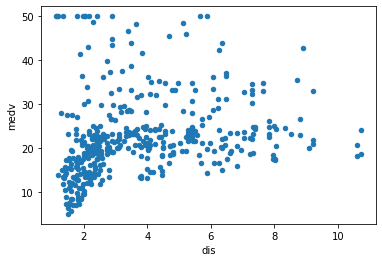

In [46]:
housing.plot(kind="scatter", x="dis", y="medv")

Vamos melhorar a visualição usando o parâmetro <font color='red'>alpha</font>, observe:

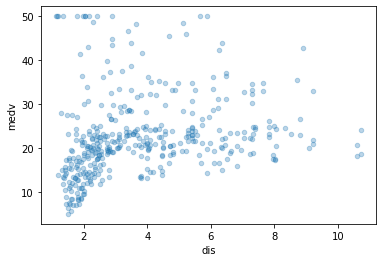

In [39]:
housing.plot(kind="scatter", x="dis", y="medv", alpha=0.3)

Interessante! Agora fica mais evidente a concentração dos agrupamentos!

De qualquer forma devemos voltar a nossa atenção ao objetivo: <font color = 'red'> preços do setor imobioliário. </font> 

No código a seguir o parâmetro "s" significa "size", tamanho em inglês. Escolhendo "s" como sendo a característica população, quanto maior o disco representa uma população maior.

O parâmetro "c" significa "color", ou cor. Esse é na verdade o que queremos saber!

O paramêtro colorbar = True indica que queremos visualizar a barra lateral informando as intensidades da cor, ou seja, do parêmetro "c".



No handles with labels found to put in legend.


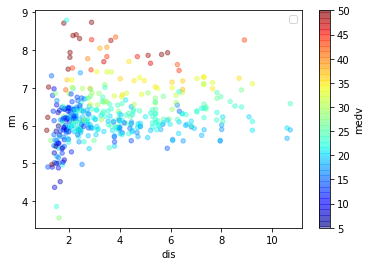

In [41]:
housing.plot(kind="scatter", x="dis", y="rm", alpha=0.4,
    c="medv", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False) #sharex=false é só pra corrigir um bug de display https://github.com/pandas-dev/pandas/issues/10611
plt.legend()

A visulização dos dados indicam que quanto mais quartos e quanto mais próximos dos centros economicos da cidade, maior o valor da casa.

Vamos então investigar essas hipóteses através da correleção estatística:

In [42]:
corr_matrix = housing.corr() #Matriz de correlações

In [43]:
corr_matrix #vamos ver a estrutura

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.194957,0.392266,-0.048422,0.408961,-0.178687,0.339665,-0.367939,0.612325,0.568313,0.273532,-0.415846,0.434491,-0.363637
zn,-0.194957,1.000000,-0.540184,-0.012799,-0.519403,0.303859,-0.571245,0.659137,-0.313429,-0.306750,-0.386411,0.179353,-0.404500,0.352369
indus,0.392266,-0.540184,1.000000,0.078490,0.766313,-0.375957,0.640592,-0.711485,0.590137,0.718778,0.369861,-0.358921,0.575379,-0.460246
chas,-0.048422,-0.012799,0.078490,1.000000,0.108753,0.126399,0.068416,-0.101227,0.005951,-0.022082,-0.134554,0.041958,-0.092712,0.185990
nox,0.408961,-0.519403,0.766313,0.108753,1.000000,-0.285392,0.725995,-0.768525,0.623017,0.672634,0.184591,-0.395422,0.576268,-0.408862
rm,-0.178687,0.303859,-0.375957,0.126399,-0.285392,1.000000,-0.219642,0.174360,-0.192591,-0.276042,-0.357854,0.131793,-0.589431,0.695048
age,0.339665,-0.571245,0.640592,0.068416,0.725995,-0.219642,1.000000,-0.739171,0.443868,0.492209,0.250594,-0.282567,0.587437,-0.360642
dis,-0.367939,0.659137,-0.711485,-0.101227,-0.768525,0.174360,-0.739171,1.000000,-0.489867,-0.525680,-0.200163,0.295066,-0.462420,0.217843
rad,0.612325,-0.313429,0.590137,0.005951,0.623017,-0.192591,0.443868,-0.489867,1.000000,0.906720,0.453401,-0.455530,0.484334,-0.368311
tax,0.568313,-0.306750,0.718778,-0.022082,0.672634,-0.276042,0.492209,-0.525680,0.906720,1.000000,0.443338,-0.452548,0.537526,-0.451597


In [44]:
corr_matrix["medv"].sort_values(ascending=False) #Ordenar valores em sentido decrescente

medv       1.000000
rm         0.695048
zn         0.352369
b          0.339883
dis        0.217843
chas       0.185990
age       -0.360642
crim      -0.363637
rad       -0.368311
nox       -0.408862
tax       -0.451597
indus     -0.460246
ptratio   -0.517646
lstat     -0.735877
Name: medv, dtype: float64

É conveniente usar o scatter_matrix do pandas. Essa função plota cada característica em relação a outra. Vamos selecionar algumas que parecem ser mais significativas.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C23E00A7C0>,
      dtype=object)

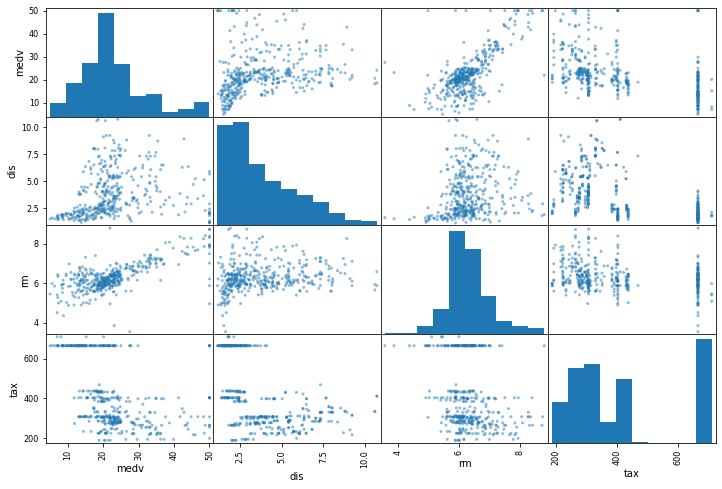

In [54]:
from pandas.plotting import scatter_matrix

attributes = ["medv", "dis", "rm",
              "tax"]
scatter_matrix(housing[attributes], figsize=(12, 8))

**OBS:** Na diagonal principal da plotagem anterior não temos atributo v.s. atributo, mas sim o histograma da característica.

Vimos antes que a característica que tinha maior correlação com o valor mediano de casas em um bairro era o número de quartos. Então vamos plotar para estudar a relação entre ambos:

(4.0, 10.0, 10.0, 40.0)

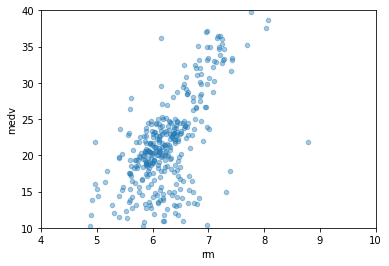

In [50]:
housing.plot(kind="scatter", x="rm", y="medv",
             alpha=0.4)
plt.axis([4, 10, 10, 40])

Vejamos agora a matriz de correlação de housing:

In [55]:
corr_matrix = housing.corr()
corr_matrix["medv"].sort_values(ascending=False)

medv       1.000000
rm         0.695048
zn         0.352369
b          0.339883
dis        0.217843
chas       0.185990
age       -0.360642
crim      -0.363637
rad       -0.368311
nox       -0.408862
tax       -0.451597
indus     -0.460246
ptratio   -0.517646
lstat     -0.735877
Name: medv, dtype: float64

De fato, casas com mais comodos tendem a ser mais caras.

Vamos ver novamente as medidas resumos.

In [57]:
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.508724,11.096535,11.203193,0.066832,0.556173,6.306639,68.890842,3.796019,9.472772,410.037129,18.485396,354.184901,12.498936,22.697772
std,8.513287,22.956818,6.907667,0.250040,0.115274,0.708953,27.929715,2.097564,8.730128,167.633110,2.198310,94.033505,6.977071,9.383483
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081960,0.000000,5.130000,0.000000,0.453000,5.911000,46.475000,2.116900,4.000000,281.000000,17.400000,374.650000,6.915000,17.200000
50%,0.252930,0.000000,9.900000,0.000000,0.538000,6.205000,77.950000,3.122200,5.000000,334.500000,19.100000,391.240000,11.430000,21.200000
75%,3.594927,12.500000,18.100000,0.000000,0.624000,6.616750,93.800000,5.212575,24.000000,666.000000,20.200000,396.060000,16.457500,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


# Preparar os dados para os algoritmos de Machine Learning

Precisamos incialmente retirar os rótulos do conjunto <fon color='blue'> strat_train_set </font> (mais a frente ficará claro).

Para isso, vamos usar o método drop:

In [58]:
housing = strat_train_set.drop("medv", axis=1) # O método drop cria cópia sem a coluna em questao
housing_labels = strat_train_set["medv"].copy() #salvando uma cópia

**OBS:** Ao longo desta seção estaremos chamando as features de treinamento como "housing". Atenção neste ponto para não confundir com o dataset inteiro. Isto é,
 tudo o que nos faremos aqui será feito somento no conjunto de treinamento!

A partir de agora vamos partir para etapa de <font color='blue'>**limpeza de dados!**</font>

Vamos começar verificando se temos dados falantes:

In [59]:
#housing.isnull().any(axis=1) verifica quais linhas possuem alguma célula null
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head() 
sample_incomplete_rows

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,tax_cat


In [60]:
sample_incomplete_rows

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,tax_cat


Não possuímo dados faltantes.

Vamos novamente revisar o nosso dataset...

In [62]:
housing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,tax_cat
450,6.71772,0.0,18.10,0,0.713,6.749,92.6,2.3236,24,666,20.2,0.32,17.44,3
119,0.14476,0.0,10.01,0,0.547,5.731,65.2,2.7592,6,432,17.8,391.50,13.61,2
200,0.01778,95.0,1.47,0,0.403,7.135,13.9,7.6534,3,402,17.0,384.30,4.45,2
480,5.82401,0.0,18.10,0,0.532,6.242,64.7,3.4242,24,666,20.2,396.90,10.74,3
360,4.54192,0.0,18.10,0,0.770,6.398,88.0,2.5182,24,666,20.2,374.56,7.79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,22.59710,0.0,18.10,0,0.700,5.000,89.5,1.5184,24,666,20.2,396.90,31.99,3
313,0.26938,0.0,9.90,0,0.544,6.266,82.8,3.2628,4,304,18.4,393.39,7.90,2
333,0.05083,0.0,5.19,0,0.515,6.316,38.1,6.4584,5,224,20.2,389.71,5.68,1
319,0.47547,0.0,9.90,0,0.544,6.113,58.8,4.0019,4,304,18.4,396.23,12.73,2


Ainda temos a última coluna que não é numérica! 

A princípios, grande parte dos algoritmos de machine learning no computador preferem os dados representados numericamente!

In [64]:
imputer.fit(housing) 

SimpleImputer(strategy='median')

Aqui, o imputer simplesmente calculou a mediana no conjunto de dados.

Vejamos algumas informações sobre o nosso objeto imputer:

In [65]:
imputer.statistics_

array([2.5293e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.3800e-01,
       6.2050e+00, 7.7950e+01, 3.1222e+00, 5.0000e+00, 3.3450e+02,
       1.9100e+01, 3.9124e+02, 1.1430e+01, 2.0000e+00])

Vamos verificar que isto é, na verdade, a mesma coisa que calcular manualmente a mediana de cada atributo:

In [67]:
housing.median().values

array([2.5293e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.3800e-01,
       6.2050e+00, 7.7950e+01, 3.1222e+00, 5.0000e+00, 3.3450e+02,
       1.9100e+01, 3.9124e+02, 1.1430e+01, 2.0000e+00])

Vamos agora finalmente <font color = 'blue'> transformar </font> o nosso conjunto de dados, aplicando, efetivamente, o valor calculado da mediana nos dados faltantes:

In [68]:
X = imputer.transform(housing) #numpy array

Vamos visualizar o conjunto X

In [69]:
X

array([[6.71772e+00, 0.00000e+00, 1.81000e+01, ..., 3.20000e-01,
        1.74400e+01, 3.00000e+00],
       [1.44760e-01, 0.00000e+00, 1.00100e+01, ..., 3.91500e+02,
        1.36100e+01, 2.00000e+00],
       [1.77800e-02, 9.50000e+01, 1.47000e+00, ..., 3.84300e+02,
        4.45000e+00, 2.00000e+00],
       ...,
       [5.08300e-02, 0.00000e+00, 5.19000e+00, ..., 3.89710e+02,
        5.68000e+00, 1.00000e+00],
       [4.75470e-01, 0.00000e+00, 9.90000e+00, ..., 3.96230e+02,
        1.27300e+01, 2.00000e+00],
       [3.39830e-01, 2.20000e+01, 5.86000e+00, ..., 3.90180e+02,
        9.16000e+00, 2.00000e+00]])

Se você se sentir mais confortável, pode transformar o conjunto X em um dataframe:

In [71]:
housing_tr = pd.DataFrame(X, columns=housing.columns, #importante informar nome das colunas
                          index=housing.index) #DataFrame Pandas

Vejamos como é este dataframe:

In [72]:
housing_tr.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,tax_cat
450,6.71772,0.0,18.10,0.0,0.713,6.749,92.6,2.3236,24.0,666.0,20.2,0.32,17.44,3.0
119,0.14476,0.0,10.01,0.0,0.547,5.731,65.2,2.7592,6.0,432.0,17.8,391.50,13.61,2.0
200,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,2.0
480,5.82401,0.0,18.10,0.0,0.532,6.242,64.7,3.4242,24.0,666.0,20.2,396.90,10.74,3.0
360,4.54192,0.0,18.10,0.0,0.770,6.398,88.0,2.5182,24.0,666.0,20.2,374.56,7.79,3.0


In [73]:
try:
    from sklearn.preprocessing import OrdinalEncoder
    print("Scikit-Learn >= 2.0")
except ImportError:
    from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20
    print("O teu Scikit-Learn tá antiguinho mô quirido")

Scikit-Learn >= 2.0


Na função a seguir, precisamos instanciar um objeto ordinal_encoder. 

Depois, usamos fit_transform para executa duas operações:

1. Método fit irá ajustar os parâmetros (mapeamento, por exemplo, quais são as variáveis categóricas); 

2. Método transform irá transformar os dados;

3. fit_transform(dados) irá ajustar parâmetros e transformar os dados.


Vamos criar um transformador customizado para adicionar atributos extras 

**OBS**:
- Vamos criar um código para o processo manual feito na etapa de Feature Engineering. 

- Vai nos ajudar a criar um pipeline mais a frente.

In [76]:
housing.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'tax_cat'],
      dtype='object')

Agora finalmente temos os nossos dados de treinamento pré-processados, assim como já temos um modelo de limpeza e tratamento de dados implentado que poderá ser aplicado no conjunto de teste.

# Selecionar e treinar um modelo

Vamos começar com um modelo simples: Regressão Linear!

In [79]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing, housing_labels) 
#Ei Regressão linear, encontre os parâmetros que melhor aproxima os dados

LinearRegression()

Vamos agora testar o nosso pipeline de pré-processamento em algumas instâncias de treino.

- Observe que após os nossos esforços em apenas uma linhas conseguimos pré-processar os dados!

In [80]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]


print("Predictions:", lin_reg.predict(some_data))

Predictions: [16.56416165 21.28579468 31.34270113 23.93571429 23.00835336]


Vamos comparar agora com os valores reais:


In [81]:
print("Labels:", list(some_labels))

Labels: [13.4, 19.3, 32.9, 23.0, 25.0]


In [82]:
some_data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,tax_cat
450,6.71772,0.0,18.10,0,0.713,6.749,92.6,2.3236,24,666,20.2,0.32,17.44,3
119,0.14476,0.0,10.01,0,0.547,5.731,65.2,2.7592,6,432,17.8,391.50,13.61,2
200,0.01778,95.0,1.47,0,0.403,7.135,13.9,7.6534,3,402,17.0,384.30,4.45,2
480,5.82401,0.0,18.10,0,0.532,6.242,64.7,3.4242,24,666,20.2,396.90,10.74,3
360,4.54192,0.0,18.10,0,0.770,6.398,88.0,2.5182,24,666,20.2,374.56,7.79,3


Agora vamos usar métricas para ver o quão bom foi o modelo:

In [83]:
from sklearn.metrics import mean_squared_error as MSE

housing_predictions = lin_reg.predict(housing)
lin_mse = MSE(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse) #Não é necessariamente obrigatório
lin_rmse

4.72412649076198

In [84]:
from sklearn.metrics import mean_absolute_error as MAE

lin_mae = MAE(housing_labels, housing_predictions)
lin_mae

3.3105278563134504

Essse modelo ainda não parece ser adequado!

In [86]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state= seed)
tree_reg.fit(housing, housing_labels)

DecisionTreeRegressor(random_state=42)

In [88]:
housing_predictions = tree_reg.predict(housing)
tree_mse = MSE(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

O quê? Erro zero? Aqui aconteceu o que nós chamamos de sobreajuste! Desconfie sempre quando o erro do teu modelo for zero. Isso não acontece na prática. O que indica que precisamos encontrar técnicas mais robustas para availiar os nossos modelos. 

Lembrando que o conjunto de teste deve ser usado apenas ao **final** do processo.

No próximo bloco abordaremos uma maneira mais adequada de usar o conjunto de treinamento para avaliar os nossos modelos.



#Avaliação de modelo

Até agora estamos treinando um modelo no conjunto de treinamento e testando nele mesmo, o que não parece ser uma estratégia muito adequada.

 Faremos então o seguinte: vamos separar o conjunto de treinamento em k = 10 pedaços (folds) e fazemos então um loop:

*   Para cada fold:
  1.   Treine o seu modelo no conjunto formado por: treino - fold
  2.   Teste o seu modelo no fold

* Ao final, calcule uma média dos k testes anteriores

Esse processo é o que chamamos de [validação cruzada](https://scikit-learn.org/stable/modules/cross_validation.html#)!



In [89]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing, housing_labels,
                         scoring="neg_mean_squared_error", cv=10) 

#cv = 10 é número de pedaços

tree_rmse_scores = np.sqrt(-scores)

**OBS:** Os recursos da validação cruzada no Scikit-Learn esperam uma função de utilidade (mais alta é melhor) ao invés de uma função custo (mais alta é pior). Assim a função de pontução é oposto à função custo (negativa). Por isso o np.sqrt(-scores) no código acima.

Vejamos os resultados:

In [90]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [4.18216305 6.77696961 5.3595595  3.99780428 4.90107131 4.50394272
 7.54088854 3.79542488 3.36325735 5.57772355]
Mean: 4.999880478605497
Standard deviation: 1.2702686309523727


Vamos ver agora para o nosso modelo de regressão linear:

In [91]:
lin_scores = cross_val_score(lin_reg, housing, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [3.85115177 4.99069343 3.88760924 4.3130263  4.13383541 5.26819418
 8.57966067 3.29416679 5.53315891 4.32899715]
Mean: 4.8180493856186555
Standard deviation: 1.4134615163524706


Note que o modelo de árvore de decisão está se sobreajustando aos dados demasiadamente, que acaba sendo pior que a regressão linear!

Vamos tentar outro modelo: "Florestas aleatórias" para regressão. 

In [92]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing, housing_labels) #Treinar modelo

RandomForestRegressor(n_estimators=10, random_state=42)

In [93]:
housing_predictions = forest_reg.predict(housing) #Predizer
forest_mse = MSE(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.4761401869352209

In [94]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [3.2788208  3.34778995 3.52565787 2.83806186 3.86753798 3.7322942
 5.89258793 3.28727205 3.00390746 3.47512841]
Mean: 3.6249058505551437
Standard deviation: 0.8099626656414741


Os resultados são melhores! 

Entretanto, ainda observe que a pontuação no conjunto de treino ainda é muito menor do que no conjuntos de validação, o que significa que o modelo ainda está se sobreajustando ao conjunto de treinamento.

Possíveis soluções:
- Simplificar o modelo;
- Regularizar o modelo;
- Obter mais dados de treinamento (hard).

# Ajustando e selecionando modelo

Vamos usar o **[Grid Search](https://scikit-learn.org/stable/modules/grid_search.html#exhaustive-grid-search)** (busca em grades) para buscar melhores parâmetros para a nossa floresta aleatória. 

In [95]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # Vamos tentar 12 = 3x4 combinação de parâmetros
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # Tentar 6 = 2×3 combinações do bootstrap no modo 'Falso'
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=seed)

# Vamos treinar com 5-folds, então temos (12+6)*5=90 rodadas de treinamento!!!

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

A melhor combinação de parâmetros encontrada:

In [96]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [97]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=10,
                      random_state=42)

Vamos olhar a pontuação de cada hiperparâmetro testado ao longo do gridSearch:

In [98]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

5.006988497434668 {'max_features': 2, 'n_estimators': 3}
4.306587694207704 {'max_features': 2, 'n_estimators': 10}
3.9203546378644774 {'max_features': 2, 'n_estimators': 30}
4.582879494926806 {'max_features': 4, 'n_estimators': 3}
4.0481051027412205 {'max_features': 4, 'n_estimators': 10}
3.762791660671456 {'max_features': 4, 'n_estimators': 30}
4.644318084110123 {'max_features': 6, 'n_estimators': 3}
4.069080045118337 {'max_features': 6, 'n_estimators': 10}
3.7759057392790467 {'max_features': 6, 'n_estimators': 30}
4.522742576305071 {'max_features': 8, 'n_estimators': 3}
3.9387087605733533 {'max_features': 8, 'n_estimators': 10}
3.6416802518792477 {'max_features': 8, 'n_estimators': 30}
4.761132852853826 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3.722455413093505 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
4.72727426196892 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3.8158702945643044 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [99]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012123,2.198018e-03,0.002396,0.001198,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-20.341097,-15.183553,...,-25.069934,11.327203,18,-1.278061e+01,-1.037017e+01,-9.630303e+00,-8.584857e+00,-5.674136e+00,-9.408015e+00,2.322454e+00
1,0.017449,2.228022e-03,0.004719,0.005763,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-12.719059,-10.074395,...,-18.546698,11.102231,11,-5.410290e+00,-4.903956e+00,-5.033202e+00,-4.829445e+00,-3.077043e+00,-4.650787e+00,8.118830e-01
2,0.064570,9.023706e-03,0.004797,0.002636,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-12.653917,-9.470456,...,-15.369180,7.632247,7,-3.422464e+00,-3.501246e+00,-3.196827e+00,-2.679681e+00,-2.659752e+00,-3.091994e+00,3.590328e-01
3,0.009994,3.152179e-06,0.002797,0.000399,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-14.397723,-13.125048,...,-21.002784,10.980406,14,-7.442387e+00,-7.773172e+00,-1.178107e+01,-6.234510e+00,-6.171265e+00,-7.880481e+00,2.051764e+00
4,0.020445,3.606302e-03,0.002798,0.001469,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-11.924973,-10.927231,...,-16.387155,7.913202,9,-5.122833e+00,-4.374999e+00,-4.375601e+00,-3.326424e+00,-2.941860e+00,-4.028343e+00,7.888985e-01
5,0.057750,9.825326e-03,0.005319,0.005714,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-11.646745,-8.938972,...,-14.158601,5.775062,4,-3.320547e+00,-2.936193e+00,-2.884829e+00,-2.112204e+00,-2.316488e+00,-2.714052e+00,4.396875e-01
6,0.012724,3.697302e-03,0.000600,0.001199,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-17.454664,-11.843621,...,-21.569690,8.252767,15,-6.550065e+00,-5.392900e+00,-6.217905e+00,-5.767681e+00,-3.630415e+00,-5.511793e+00,1.019392e+00
7,0.023350,6.984306e-03,0.003724,0.006062,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-10.335675,-11.628288,...,-16.557412,7.029910,10,-5.001553e+00,-4.049977e+00,-3.858801e+00,-3.016034e+00,-2.115269e+00,-3.608327e+00,9.776403e-01
8,0.065229,5.480842e-03,0.000999,0.001999,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-10.498117,-9.604141,...,-14.257464,6.191423,5,-3.151403e+00,-2.603679e+00,-2.763396e+00,-2.231708e+00,-2.118812e+00,-2.573800e+00,3.726943e-01
9,0.012205,5.779039e-03,0.005164,0.003361,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-16.722977,-15.093731,...,-20.455200,10.077602,13,-8.930671e+00,-5.755913e+00,-6.700261e+00,-6.169364e+00,-5.136619e+00,-6.538566e+00,1.300971e+00


Uma abordagem alternativa ao GridSearch é usar o [RandomizedSearchCV](https://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-optimization). Essa nova ferrramenta de busca é indicada para quando deseja-se buscar hiperparâmetros com um número elevado de combinaçoes.

- É usada da mesma maneira que o GridSearch, mas ao invés de tentar todas as combinações ela selaciona um valor aleatório para cada hiperparâmetro em cada iteração e avalia um número de combinações aleatórias;

- Se você permitir muitas iterações (por exemplo, mais de 1000), ela irá explorar 1000 combinações diferentes de hiperparâmetros.



In [100]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=seed)

rnd_search = RandomizedSearchCV(forest_reg,
                                param_distributions=param_distribs,
                                n_iter=10,
                                cv=5, 
                                scoring='neg_mean_squared_error', 
                                random_state=seed)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C23E86B1F0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C23F1CE9D0>},
                   random_state=42, scoring='neg_mean_squared_error')

Vejamos os resultados:

In [101]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3.5151105075972113 {'max_features': 7, 'n_estimators': 180}
3.9582981945158986 {'max_features': 5, 'n_estimators': 15}
3.657485324285938 {'max_features': 3, 'n_estimators': 72}
3.8191756353333246 {'max_features': 5, 'n_estimators': 21}
3.5421624808847696 {'max_features': 7, 'n_estimators': 122}
3.6566024421473124 {'max_features': 3, 'n_estimators': 75}
3.6510994339346823 {'max_features': 3, 'n_estimators': 88}
3.559594567373378 {'max_features': 5, 'n_estimators': 100}
3.64538988013481 {'max_features': 3, 'n_estimators': 150}
4.741857242476273 {'max_features': 5, 'n_estimators': 2}


Vejamos as características mais importantes! (feature das florestas aleatórias)

In [102]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.04939748, 0.00343733, 0.0642746 , 0.00437101, 0.05841593,
       0.24213954, 0.03315781, 0.06502976, 0.00488478, 0.0182802 ,
       0.14375588, 0.0252444 , 0.285294  , 0.00231729])

#Modelo e teste final

Após todas as etapas anteriores, podemos fazer o teste final do nosso modelo:

In [126]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("medv", axis=1)
y_test = strat_test_set["medv"].copy()

In [127]:
final_predictions = final_model.predict(X_test)

final_mse = MSE(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

# Erro final

In [128]:
final_rmse

2.91938836597198